# K-Means Clustering with PCA Visualisation

### Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importing the DataSet

In [9]:
X = pd.read_csv("weatherAUS.csv")
X = X.fillna(0)
X = X.replace({'Yes':1, 'No':0})
X = X.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1)
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.069546,23.020041,2.307990,3.107787,3.957069,37.210525,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,2.738677,2.669559,16.784235,21.145405,0.219167,0.219146
std,6.482693,7.407808,8.389771,4.163070,4.680785,16.649265,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,3.132539,3.048519,6.712427,7.635396,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.500000,17.800000,0.000000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,0.000000,0.000000,12.100000,16.200000,0.000000,0.000000
50%,11.900000,22.500000,0.000000,1.600000,0.100000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,1.000000,1.000000,16.600000,20.900000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


### Feature Scaling using Standard Scaler

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print (X[:5, :]) # Printing the first 5 rows to notice irregularities

[[ 0.20523246 -0.01620475 -0.20358073 -0.74651586 -0.84538868  0.40779566
   0.68128262  0.62838216  0.16085245 -1.2510905   0.30774127  0.31297023
   1.67957685 -0.87569321  0.01724645  0.08573194 -0.52979545 -0.52976353]
 [-0.72031204  0.28078019 -0.27509664 -0.74651586 -0.84538868  0.40779566
  -1.09776444  0.40905925 -1.12560943 -1.11676782  0.31709158  0.31523499
  -0.87427045 -0.87569321  0.06193983  0.41315549 -0.52979545 -0.52976353]
 [ 0.12810375  0.36177609 -0.27509664 -0.74651586 -0.84538868  0.5279215
   0.57009218  0.84770508 -1.41148985 -0.89289671  0.30741884  0.31814683
  -0.87427045 -0.21963479  0.6280559   0.26908913 -0.52979545 -0.52976353]
 [-0.44264869  0.67226034 -0.27509664 -0.74651586 -0.84538868 -0.79346269
  -0.31943135 -1.0165397  -1.07796269 -1.51973584  0.33966128  0.33141186
  -0.87427045 -0.87569321  0.19601995  0.70128822 -0.52979545 -0.52976353]
 [ 0.83768787  1.25273091 -0.15590346 -0.74651586 -0.84538868  0.22760691
  -0.76419311  0.18973633  0.684966

### Method to Calculate Euclidean Distance

In [11]:

def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis=1))


### K-Means Function

In [12]:

def K_means(k, X, max_iterations=200):
    centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(k, X.shape[1]))
    for i in range(max_iterations):
        y=[]

        for data_point in X:
            distances = euclidean_distance(data_point, centroids)
            cluster_num = np.argmin(distances)
            y.append(cluster_num)

        y = np.array(y)

        cluster_indices = []
        
        for i in range(k):
            cluster_indices.append(np.argwhere(y == i)) 

        cluster_centers = []

        for i, indices in enumerate(cluster_indices):
            if len(indices) == 0:
                cluster_centers.append(centroids[i])
            else:
                cluster_centers.append(np.mean(X[indices], axis=0)[0])
        
        if np.max(centroids - np.array(cluster_centers)) < 0.0001:
            break
        else:
            centroids = np.array(cluster_centers)
    
    return y

### Execution of the function with assigned values to 'k' and 'max iterations'

In [13]:
k = 4
max_iters = 1000
cluster_assn = K_means(k, X, max_iters)

### PCA Visualisation

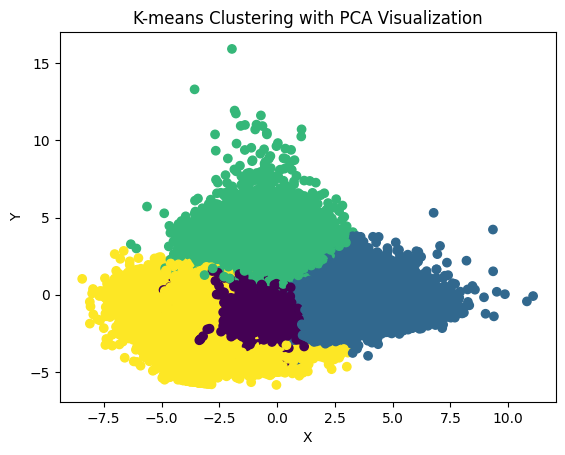

In [14]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(X)
plt.title('K-means Clustering with PCA Visualization')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_assn, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
